In [1]:
import os
from glob import glob
import threading

import numpy as np
import dask.dataframe as dd
from dask import delayed
import pandas as pd
import xarray as xr

%matplotlib inline
from matplotlib import pyplot as plt
#import matplotlib.animation as anim

import crocosi.postp as pp
from crocosi.jet import set_relevant_time

/home1/datahome/zcaspar/miniconda3/envs/croco/lib/python3.7/site-packages/distributed/utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  RuntimeWarning,


In [2]:
from dask_jobqueue import PBSCluster
cluster = PBSCluster()
w = cluster.scale(28*2)

In [3]:
from dask.distributed import Client
#client = Client()  # set up local cluster on your laptop
client = Client(cluster) # with distributed cluster

In [4]:
client

Client Scheduler: tcp://10.148.1.35:43570 Dashboard: http://10.148.1.35:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [5]:
root_path = '/home/datawork-lops-osi/slgentil/croco/jetn/'
run = 'jet_cfg1_wp75_4km_1500a2000j_floats_lev50_itide/'

gparams = {'f0': 1.0313e-4, 'beta': 1.6186e-11}
r = pp.CROCOrun(root_path+run, prefix='file_', open_nc=['surf'], 
                chunk_time={'his': 1, 'surf': 1}, grid_params=gparams)
#set_relevant_time(r) # this triggers slow computations later on, don't know why

In [6]:
ds = r['surf']

In [8]:
ssh_mean = ds.ssh.mean(axis=0)

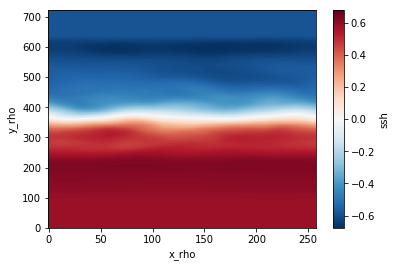

In [9]:
ssh_mean.plot()

In [13]:
sla = ds.ssh-ssh_mean

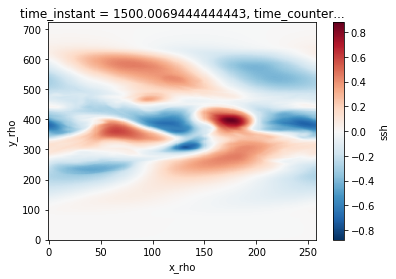

In [15]:
sla[0,:,:].plot()

In [13]:
y_bins = np.arange(150., 550., 5.)
y_idx = pd.IntervalIndex.from_breaks(y_bins)
ds['y'] = pd.cut(ds.y_rho, bins=y_bins)

In [15]:
x_bins = np.arange(1., 250., 5.)
x_idx = pd.IntervalIndex.from_breaks(x_bins)
ds['x'] = pd.cut(ds.x_rho, bins=x_bins)

In [16]:
ds

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, s_rho_slice0: 1, time: 72000, x: 258, x_rho: 258, x_u: 257, y: 722, y_rho: 722, y_v: 721)
Coordinates:
    eta_rho              (y_rho, x_rho) float32 dask.array<chunksize=(722, 258), meta=np.ndarray>
    eta_u                (y_rho, x_u) float32 dask.array<chunksize=(722, 257), meta=np.ndarray>
    eta_v                (y_v, x_rho) float32 dask.array<chunksize=(721, 258), meta=np.ndarray>
    xi_u                 (y_rho, x_u) float32 dask.array<chunksize=(722, 257), meta=np.ndarray>
    xi_rho               (y_rho, x_rho) float32 dask.array<chunksize=(722, 258), meta=np.ndarray>
    xi_v                 (y_v, x_rho) float32 dask.array<chunksize=(721, 258), meta=np.ndarray>
  * s_rho_slice0         (s_rho_slice0) float32 -0.01
    time_instant         (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    time_counter         (time) float64 1.5e+03 1.5e+03 1.5e+03 ... 2e+03 2e+03
    f                    (y_rho, x_rho)

In [1]:
u_mean = ds.u[:,0,:,:].mean(axis=[0,2]).compute()

NameError: name 'ds' is not defined

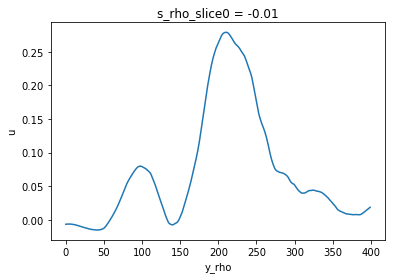

In [29]:
u_mean.sel(y_rho=slice(150,550)).plot()

In [24]:
ds.u[:,0,:,:]

<xarray.DataArray 'u' (time: 72000, y_rho: 722, x_u: 257)>
dask.array<getitem, shape=(72000, 722, 257), dtype=float32, chunksize=(1, 722, 257), chunktype=numpy.ndarray>
Coordinates:
    eta_u         (y_rho, x_u) float32 dask.array<chunksize=(722, 257), meta=np.ndarray>
    xi_u          (y_rho, x_u) float32 dask.array<chunksize=(722, 257), meta=np.ndarray>
    s_rho_slice0  float32 -0.01
    time_instant  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    time_counter  (time) float64 1.5e+03 1.5e+03 1.5e+03 ... 2e+03 2e+03 2e+03
Dimensions without coordinates: time, y_rho, x_u
Attributes:
    long_name:           v-momentum component
    units:               meter second-1
    online_operation:    instant
    interval_operation:  300 s
    interval_write:      600 s
    cell_methods:        time: point (interval: 300 s)

In [30]:
v_mean = ds.v[:,0,:,:].mean(axis=[0,1]).compute()

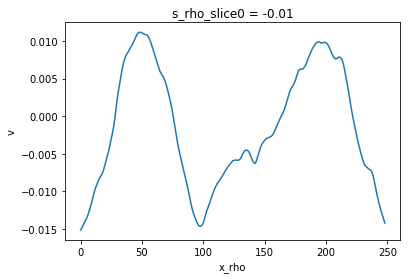

In [31]:
v_mean.sel(x_rho=slice(1,250)).plot()

In [16]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home1/datahome/zcaspar/miniconda3/envs/croco/lib/python3.7/site-packages/distributed/utils.py", line 662, in log_errors
    yield
  File "/home1/datahome/zcaspar/miniconda3/envs/croco/lib/python3.7/site-packages/distributed/client.py", line 1290, in _close
    await gen.with_timeout(timedelta(seconds=2), list(coroutines))
concurrent.futures._base.CancelledError
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home1/datahome/zcaspar/miniconda3/envs/croco/lib/python3.7/site-packages/distributed/utils.py", line 662, in log_errors
    yield
  File "/home1/datahome/zcaspar/miniconda3/envs/croco/lib/python3.7/site-packages/distributed/client.py", line 1019, in _reconnect
    await self._close()
  File "/home1/datahome/zcaspar/miniconda3/envs/croco/lib/python3.7/site-packages/distributed/client.py", l